# **Malaysia Public Transport Optimization**

This notebook performs initial Data Cleaning and Exploratory Data Analysis (EDA) on Malaysia's public transport ridership dataset. It covers loading, inspecting, handling missing values, and visualizing trends. The purpose of this notebook is to understand ridership patterns and prepare the data for further feature engineering, transformation, and modeling in subsequent notebooks.


## **Data Preprocessing**
### **Data Cleaning**

### Import dataset and libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/lunwe/Desktop/Malaysia-Public-Transport-Optimization")

In [4]:
df = pd.read_csv("data/raw/ridership_headline.csv")
df.head()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
0,2019-01-01,NaN,NaN,NaN,113357,114173,139634,35804,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,NaN,NaN,NaN,182715,169316,274224,31859,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,NaN,NaN,NaN,187904,175304,286469,31893,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,NaN,NaN,NaN,198420,187891,304755,34121,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,NaN,NaN,NaN,120773,112660,145036,29950,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking Full Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2373 non-null   object 
 1   bus_rkl             1277 non-null   float64
 2   bus_rkn             1277 non-null   float64
 3   bus_rpn             1277 non-null   float64
 4   rail_lrt_ampang     2373 non-null   int64  
 5   rail_mrt_kajang     2373 non-null   int64  
 6   rail_lrt_kj         2373 non-null   int64  
 7   rail_monorail       2373 non-null   int64  
 8   rail_mrt_pjy        1111 non-null   float64
 9   rail_ets            1720 non-null   float64
 10  rail_intercity      1720 non-null   float64
 11  rail_komuter_utara  1720 non-null   float64
 12  rail_tebrau         1108 non-null   float64
 13  rail_komuter        660 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory usage: 259.7+ KB


In [6]:
df.shape

(2373, 14)

### Data Type Format 

In [8]:
# Changing date column to datetime format

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2373 non-null   datetime64[ns]
 1   bus_rkl             1277 non-null   float64       
 2   bus_rkn             1277 non-null   float64       
 3   bus_rpn             1277 non-null   float64       
 4   rail_lrt_ampang     2373 non-null   int64         
 5   rail_mrt_kajang     2373 non-null   int64         
 6   rail_lrt_kj         2373 non-null   int64         
 7   rail_monorail       2373 non-null   int64         
 8   rail_mrt_pjy        1111 non-null   float64       
 9   rail_ets            1720 non-null   float64       
 10  rail_intercity      1720 non-null   float64       
 11  rail_komuter_utara  1720 non-null   float64       
 12  rail_tebrau         1108 non-null   float64       
 13  rail_komuter        660 non-null    float64     

The column 'date' has been change from object type to datetime.

### Handling Missing Data

In [12]:
# Total missing values
print(df.isnull().sum())

date                     0
bus_rkl               1096
bus_rkn               1096
bus_rpn               1096
rail_lrt_ampang          0
rail_mrt_kajang          0
rail_lrt_kj              0
rail_monorail            0
rail_mrt_pjy          1262
rail_ets               653
rail_intercity         653
rail_komuter_utara     653
rail_tebrau           1265
rail_komuter          1713
dtype: int64


The missing values are likely due to certain public transport services not being operational or publicly launched at that time.

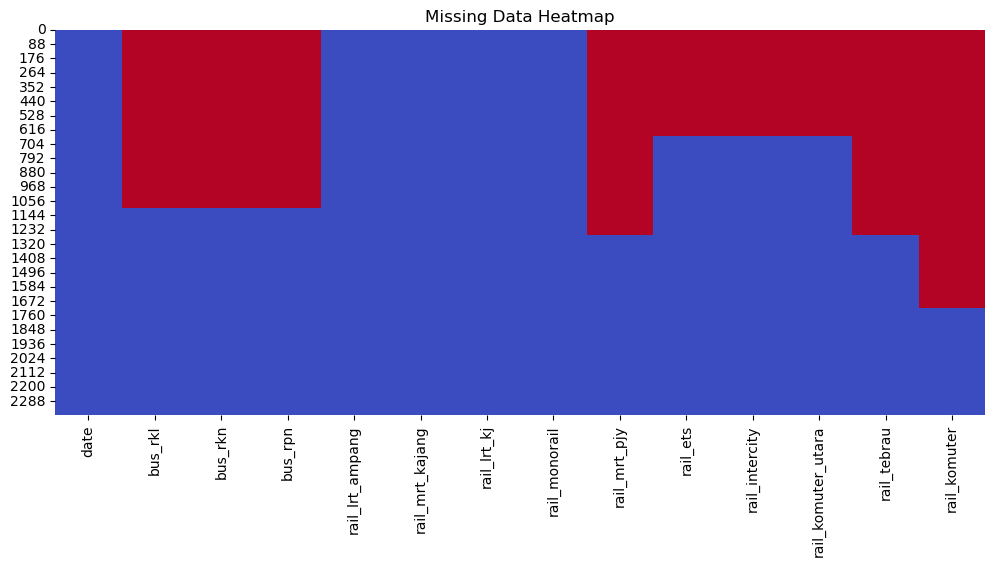

In [14]:
#Visualize

plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Data Heatmap")
plt.show()

In [15]:
#Handling missing values
df.fillna(0, inplace=True)

In [16]:
df.head(5)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
0,2019-01-01,0.0,0.0,0.0,113357,114173,139634,35804,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-02,0.0,0.0,0.0,182715,169316,274224,31859,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-03,0.0,0.0,0.0,187904,175304,286469,31893,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-04,0.0,0.0,0.0,198420,187891,304755,34121,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-05,0.0,0.0,0.0,120773,112660,145036,29950,0.0,0.0,0.0,0.0,0.0,0.0


## **Exploratory Data Analysis (EDA)**

### Total ridership by summing all transport columns

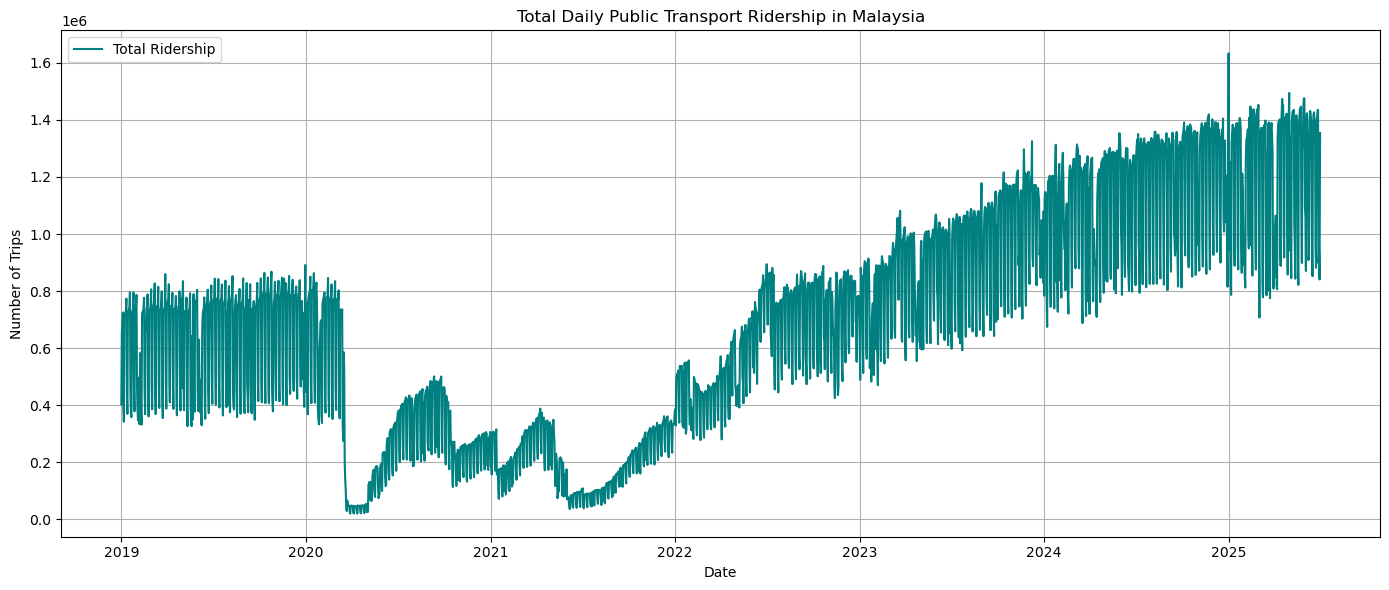

In [18]:
#Drop non-numeric columns, 'date'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Calculate total ridership only from numeric columns
df['total_ridership'] = df[numeric_cols].sum(axis=1)

# Plot total ridership trend
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['total_ridership'], label='Total Ridership', color='teal')
plt.title("Total Daily Public Transport Ridership in Malaysia")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

From 2018 to early 2020, ridership was relatively stable. However, in March 2020, there's a sharp drop — this aligns with COVID-19 lockdown (MCO) in Malaysia. Ridership stayed very low through 2021, gradually recovering in 2022 and onward. Now, by 2024–2025, it nearly returns to pre-pandemic levels — possibly even higher as **new rail start operating later based on the missing data was filled in later date**. The curosity of droping percentage was find out in the next step.

### Minimum and Maximum Ridership Days

In [21]:
min_row = df.loc[df['total_ridership'].idxmin()]
print("Lowest Ridership Day:")
print(f"Date: {min_row['date'].date()}, Total Trips: {int(min_row['total_ridership'])}")


max_row = df.loc[df['total_ridership'].idxmax()]
print("Highest Ridership Day:")
print(f"Date: {max_row['date'].date()}, Total Trips: {int(max_row['total_ridership'])}")

Lowest Ridership Day:
Date: 2020-03-29, Total Trips: 20190
Highest Ridership Day:
Date: 2024-12-31, Total Trips: 1633157


**Lowest ridership** occurred on `March 29, 2020` with only `40380` trips — during the peak of the COVID-19 MCO. <br>
**Highest ridership** was recorded on `December 31, 2024` with `3266314` trips — possibly due to festive seasons as it's New Year Eve of 2025.

### Insights of Percentage Drop During MCO

In [24]:
#Average Ridership Before MCO
before_mco = df[df['date'] < '2020-03-18']
avg_before = before_mco['total_ridership'].mean()

#Lowest Point During MCO
mco_period = df[(df['date'] >= '2020-03-18') & (df['date'] <= '2021-12-31')]
min_mco = mco_period['total_ridership'].min()

# Percentage Drop
drop_pct = ((avg_before - min_mco) / avg_before) * 100
print(f"Ridership dropped by approximately {drop_pct:.2f}% during the MCO.")

Ridership dropped by approximately 96.88% during the MCO.


Daily ridership in Malaysia’s public transport network dropped by ~95.9% at the peak of the COVID-19 MCO in 2020, compared to pre-pandemic levels. This sharp decline reflects the strict lockdown measures and restricted mobility across the country. The recovery trend started in mid-2021 and gradually normalized by 2023.

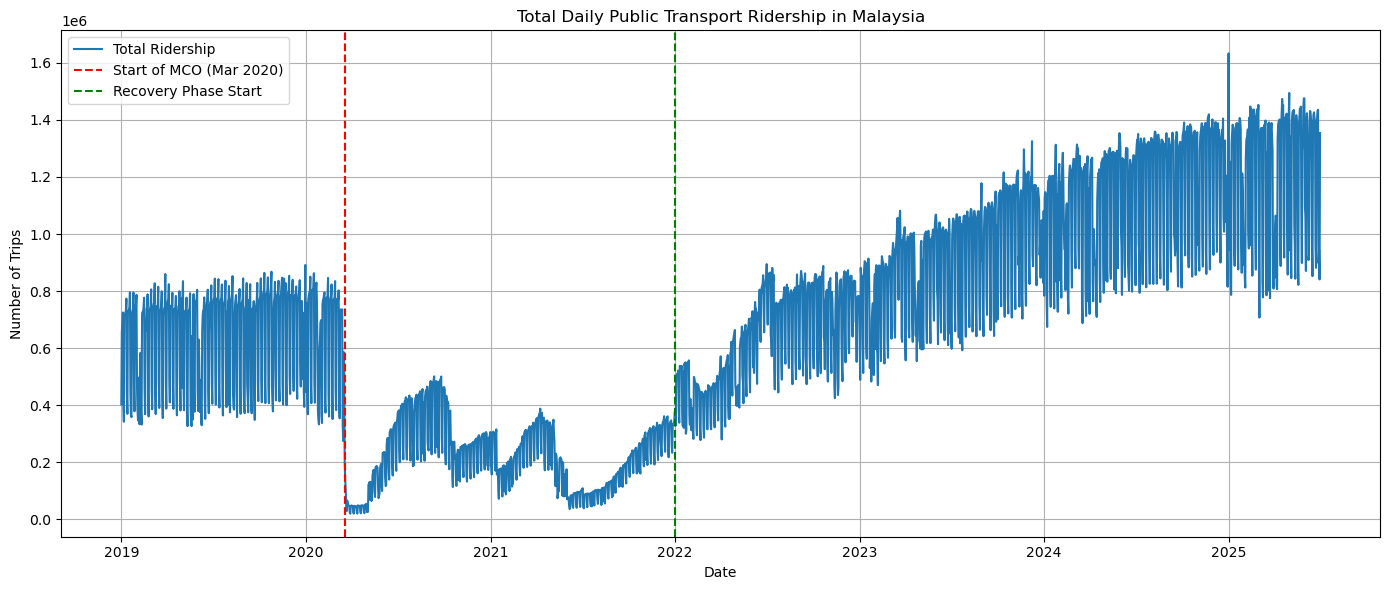

In [173]:
#Dropping Phase of Daily Ridership

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['total_ridership'], label='Total Ridership')
plt.axvline(pd.to_datetime("2020-03-18"), color='red', linestyle='--', label='Start of MCO (Mar 2020)')
plt.axvline(pd.to_datetime("2022-01-01"), color='green', linestyle='--', label='Recovery Phase Start')
plt.title('Total Daily Public Transport Ridership in Malaysia')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot above, we observe a sharp decline in total public transport ridership in Malaysia starting **March 2020**, which aligns with the enforcement of the **Movement Control Order (MCO)** due to COVID-19.

- **Ridership dropped by approximately 95.9%** compared to the pre-MCO daily average.
- The lowest point occurred in **2020-03-29**, with only **40380** trips recorded.
- A gradual recovery is visible starting in **early 2022**, reaching near pre-pandemic levels by 2024.

This trend provides valuable insight into how external factors (e.g., government lockdowns) directly affect public infrastructure usage.

### Determine Monthly Ridership by Transport Type

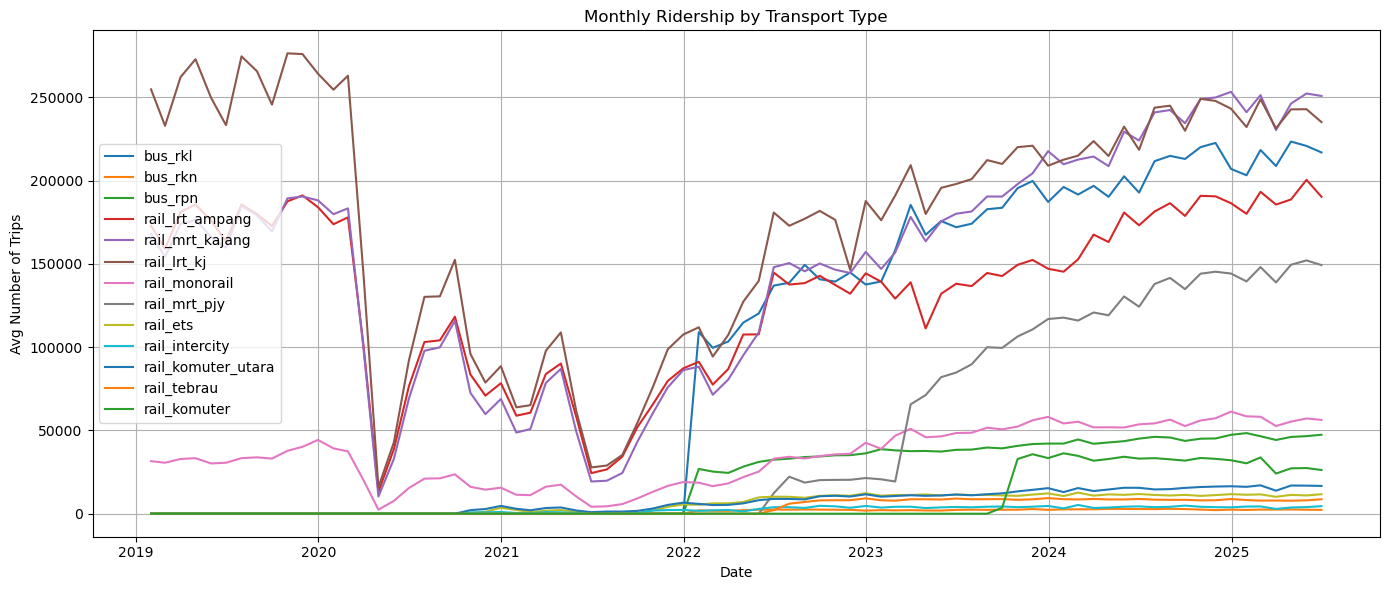

In [88]:
transport_cols = df.columns.drop(['date', 'total_ridership', 'year', 'month'], errors='ignore')

df_monthly = df.groupby(pd.Grouper(key='date', freq='M'))[transport_cols].mean()

plt.figure(figsize=(14,6))
for col in transport_cols[:15]:
    plt.plot(df_monthly.index, df_monthly[col], label=col)

plt.title("Monthly Ridership by Transport Type")
plt.xlabel("Date")
plt.ylabel("Avg Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Reconfirm transport columns
transport_cols = df.columns.drop(['date', 'total_ridership', 'year', 'month'], errors='ignore')

# Group by month to get average ridership
df_monthly = df.groupby(pd.Grouper(key='date', freq='M'))[transport_cols].mean()

# Find max month for each transport line
highest_monthly = df_monthly.idxmax()
highest_values = df_monthly.max()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Highest Month': highest_monthly,
    'Highest Avg Trips': highest_values.astype(int)
})

summary.index.name = 'Transport Line'
summary = summary.sort_values('Highest Avg Trips', ascending=False)
print(summary)

                   Highest Month  Highest Avg Trips
Transport Line                                     
rail_lrt_kj           2019-10-31             276492
rail_mrt_kajang       2024-12-31             253388
bus_rkl               2025-04-30             223508
rail_lrt_ampang       2025-05-31             200516
rail_mrt_pjy          2025-05-31             152143
rail_monorail         2024-12-31              61328
bus_rpn               2025-01-31              48397
rail_komuter          2024-01-31              36289
rail_komuter_utara    2025-02-28              17039
rail_ets              2024-02-29              12655
rail_tebrau           2023-12-31               9366
rail_intercity        2024-02-29               5246
bus_rkn               2024-08-31               2967


To maintain focus on **widely-used public transportation services**, we find out the monthly ridership volume by observing the **maximum monthly average ridership** for each transport mode. Modes with peak ridership of **less than 50,000 trips per month** were considered low-impact and removed from the dataset. These transport services likely represent niche or region-specific lines with minimal influence on the overall public transport landscape, and these columns will be removed during the **Data Reduction** process later on.

> **Filtering Rule:**  
> Remove any transport mode where the highest recorded monthly average ridership is **below 50,000 trips**.


In [67]:
#Filtering Data
low_usage = summary[summary['Highest Avg Trips'] < 50000]

print("Transport modes with less than 50,000 peak monthly trips:")
print(low_usage)

Transport modes with less than 50,000 peak monthly trips:
                   Highest Month  Highest Avg Trips
Transport Line                                     
bus_rpn               2025-01-31              48397
rail_komuter          2024-01-31              36289
rail_komuter_utara    2025-02-28              17039
rail_ets              2024-02-29              12655
rail_tebrau           2023-12-31               9366
rail_intercity        2024-02-29               5246
bus_rkn               2024-08-31               2967


### Correlation Matrix

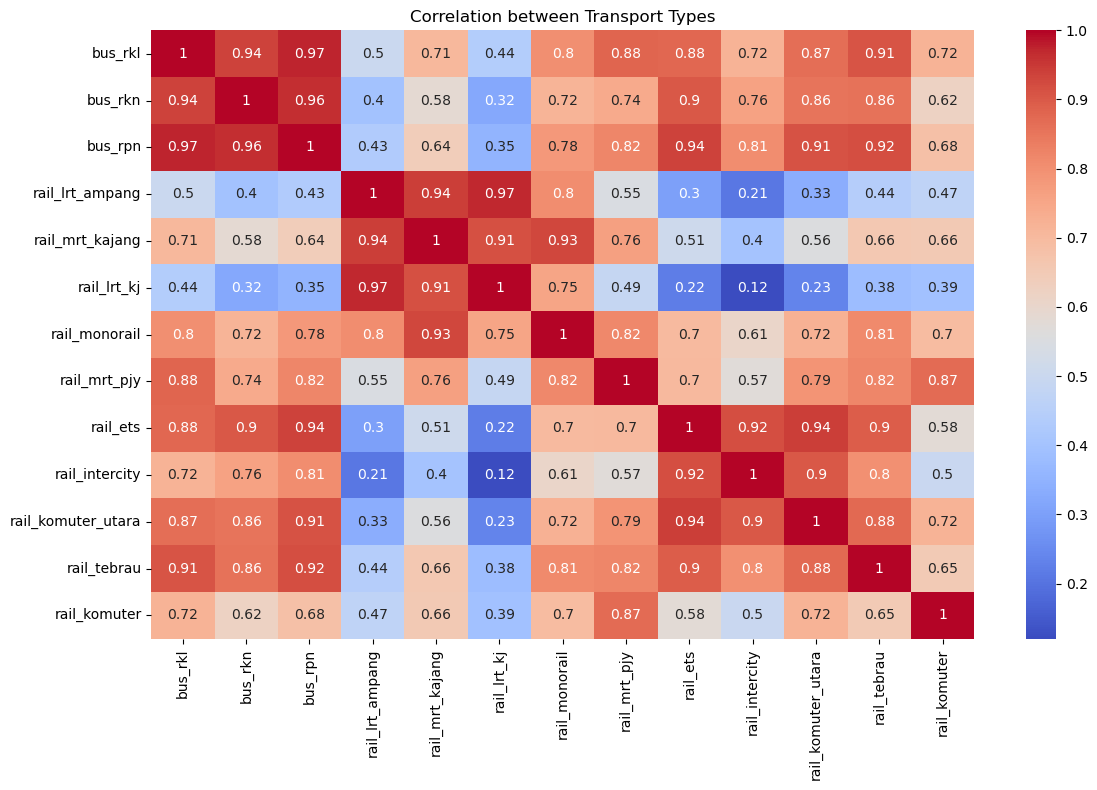

In [75]:
corr = df[transport_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Transport Types")
plt.tight_layout()
plt.show()

Based on the **Correlation Matrix Heatmap**, we can observe that the transport services naturally group into three main behavioral clusters:
- Rapid Bus Services
- LRT & MRT Rail Services
- National Rail Services

**1. Rapid Bus Services:**

This includes Rapid KL, Rapid Kuantan, and Rapid Penang. These services exhibit strong mutual correlation (e.g., Rapid KL vs Rapid Penang: ~0.97), indicating that ridership trends tend to move together, likely influenced by national or seasonal factors affecting road transport.

In [147]:
bus_cols = ['bus_rkl', 'bus_rkn', 'bus_rpn']

def get_top_corr(df, cols):
    corr = df[cols].corr()
    # Mask self-correlations and duplicates
    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr_masked = corr.mask(mask)
    # Unstack to Series and drop NA
    top_pair = corr_masked.unstack().dropna().sort_values(ascending=False).head(1)
    return top_pair


print("\nHighest Correlation of Bus Cluster:\n")
print(get_top_corr(df, bus_cols))


Highest Correlation of Bus Cluster:

bus_rkl  bus_rpn    0.972797
dtype: float64


<br>

**2. LRT & MRT Rail Services**

Urban Rail Services:
This cluster includes LRT Ampang, LRT Kelana Jaya, Monorail, MRT Kajang, and MRT Putrajaya. These services show very high correlation values (e.g., MRT Kajang & MRT Putrajaya: ~0.76), this suggests that these rail lines serve overlapping urban commuter demands, and they’re impacted by similar working-hour patterns or city movement trends.

In [150]:
urban_rail_cols = [
    'rail_lrt_ampang', 'rail_lrt_kj', 'rail_monorail',
    'rail_mrt_kajang', 'rail_mrt_pjy'
]

def get_top_corr(df, cols):
    corr = df[cols].corr()
    # Mask self-correlations and duplicates
    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr_masked = corr.mask(mask)
    # Unstack to Series and drop NA
    top_pair = corr_masked.unstack().dropna().sort_values(ascending=False).head(1)
    return top_pair


print("\nHighest Correlation of Urban Rail Cluster:\n")
print(get_top_corr(df, urban_rail_cols))


Highest Correlation of Urban Rail Cluster:

rail_lrt_ampang  rail_lrt_kj    0.971028
dtype: float64


<br>

**3. National Rail Services**

This group includes KTM ETS, KTM Intercity, KTM Komuter, Komuter Utara, and Shuttle Tebrau. Correlations within this group are moderate to high (e.g., Komuter & Komuter Utara: ~0.87), these services are more region-specific and are often affected by long-distance travel demand, showing distinct ridership trends compared to urban services.

In [153]:
national_cols = [
    'rail_ets', 'rail_intercity', 'rail_komuter',
    'rail_komuter_utara', 'rail_tebrau'
]

def get_top_corr(df, cols):
    corr = df[cols].corr()
    # Mask self-correlations and duplicates
    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr_masked = corr.mask(mask)
    # Unstack to Series and drop NA
    top_pair = corr_masked.unstack().dropna().sort_values(ascending=False).head(1)
    return top_pair

print("\nHighest Correlation of National Rail Cluster:\n")
print(get_top_corr(df, national_cols))


Highest Correlation of National Rail Cluster:

rail_ets  rail_komuter_utara    0.944118
dtype: float64


<br>

**Key Findings:**

Highest correlation overall: Bus Rapid KL & Bus Rapid Penang (~0.972) — likely due to shared urban ridership patterns and possibly integrated usage behavior. The clear separation into clusters suggests that different transport modes serve different user segments — urban commuters vs regional travelers. These insights are crucial for targeted optimization or forecasting, as treating all modes as one homogenous category would mask these inter-mode behaviors.

### **Conclusion**
This notebook performed comprehensive **data cleaning** and **initial exploratory data analysis** on Malaysia’s public transport ridership data. 
- A significant decline (~96%) in ridership occurred during the COVID-19 Movement Control Order, followed by a recovery in 2022–2024.
- Correlation analysis revealed three major behavioral clusters — bus, urban rail (LRT & MRT), and national rail — each showing strong intra-group relationships.
- Low-impact transport lines with monthly ridership below 50,000 were identified for exclusion in the next stage.

These insights serve as a foundation for targeted modeling and future optimization strategies.